# Research Questions

## RQ1: How does the numeric rating/score of reviews affect the booking rates of listings?

## RQ2: How does the sentiment and language used in Airbnb text reviews correlate with booking rate?

## RQ3: Can the frequency and quality of host responses (time) predict the likelihood of repeat or future bookings?

- handle missing values (henry)
- coorelation analysis (Brandon)
- histogram/scatterplot for some key variables 
- summary stats (nawal)


1) If your research questions have been updated from the proposal. What's your new research questions?
2) Describe if your methodology has been updated since milestone 1 (proposal) and how. 
3) Describe your current results, e.g., finding from data exploration, answer to research questions 1. 
4) Update the member contribution section based on progress so far.

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
import pandas as pd

# Replace 'your_dataset.csv' with the path to your CSV file
file_path = './raw-dataset/toronto_reviews.csv' 

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Output the first 5 rows of the DataFrame
df

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1419,38924112,2015-07-19,11308465,Marcela,Having the opportunity of arriving to Alexandr...
1,1419,44791978,2015-08-29,9580285,Marco,We have no enough words to describe how beauty...
2,1419,45957133,2015-09-07,38394721,Andrea,The listing was exceptional and an even better...
3,1419,67295154,2016-03-28,3515044,Shaun,Alexandra's home was amazing and in such a nea...
4,1419,177702208,2017-08-03,13987100,Kate,Beautiful home. Very comfortable and clean. Pe...
...,...,...,...,...,...,...
511134,1052319083870161124,1060278841405099130,2024-01-02,488503452,QiuYang,Awesome place to rent
511135,1057929286925165858,1063800272543205518,2024-01-07,116898580,Hoshane,Excellent
511136,1053010334213066893,1060237917554723922,2024-01-02,218317215,Virginia,"Boa localização , perto de restaurantes , merc..."
511137,1061704502413506115,1063069435771397497,2024-01-06,145523200,Barento,"Space was very clean and comfortable, definite..."


(20630, 75)
(8361, 75)
(39202, 75)
(91778, 75)
(25480, 75)
(511139, 6)
(378989, 6)
(986810, 6)
(1649190, 6)
(560773, 6)


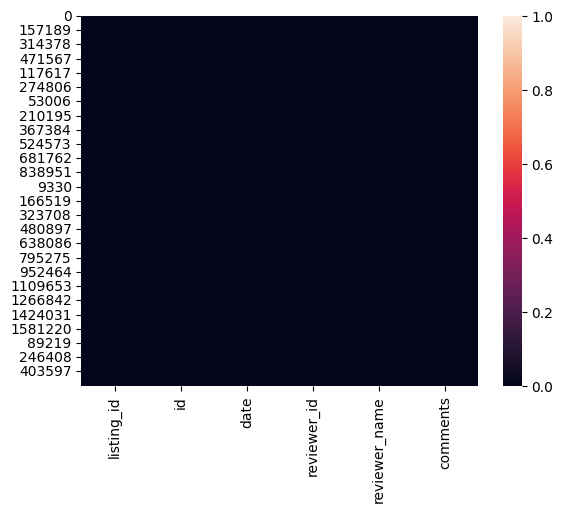

In [41]:
def combine_data(source_folder_name="raw-dataset"):
    
    locations = ['toronto','sanfran','nyc','london','sydney']
    types = ['listings', 'reviews']

    global listings, reviews
    listings = pd.DataFrame()
    reviews = pd.DataFrame()

    for t in types:
        
        data = []
        for l in locations:
            filename = f"./{source_folder_name}/{l}_{t}.csv"
            d = pd.read_csv(filename)
            data.append(d)
            print(d.shape)

        if t == 'listings':
            listings = pd.concat(data)

        if t == 'reviews':
            reviews = pd.concat(data)

def visualize_missing_values(df):
    sns.heatmap(df.isnull())
    
combine_data()

visualize_missing_values(reviews)


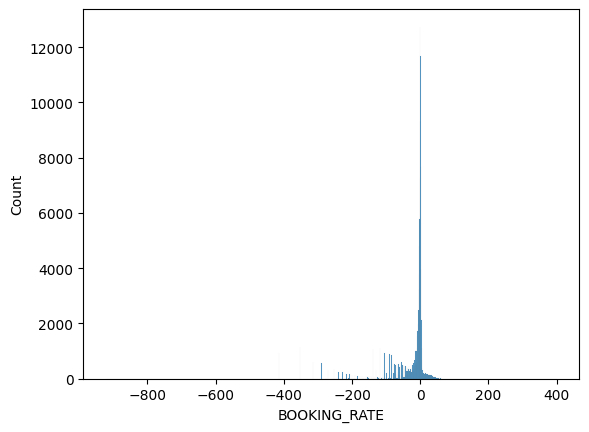

In [42]:
short_term_listings = listings[listings['minimum_nights_avg_ntm'] < 100]
short_term_listings = short_term_listings[short_term_listings['reviews_per_month'] < 20]


short_term_listings['BOOKING_RATE'] = short_term_listings['minimum_nights'] * np.log(short_term_listings['reviews_per_month'])
# sns.histplot(short_term_listings['reviews_per_month'])
sns.histplot(short_term_listings['BOOKING_RATE'])
plt.show()



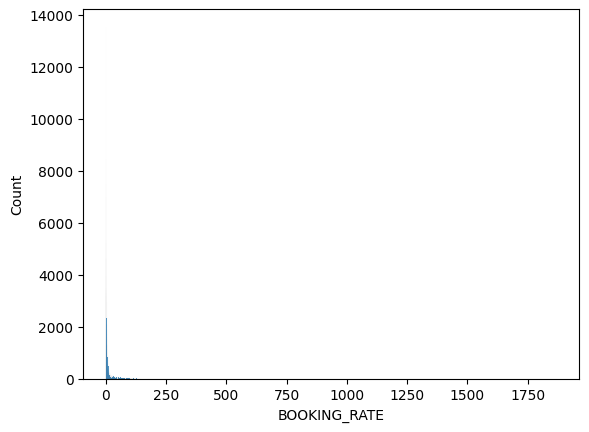

In [11]:

# WITHOUT LOG

listings['BOOKING_RATE'] = listings['minimum_nights'] * listings['reviews_per_month']
sns.histplot(listings['BOOKING_RATE'])
plt.show()

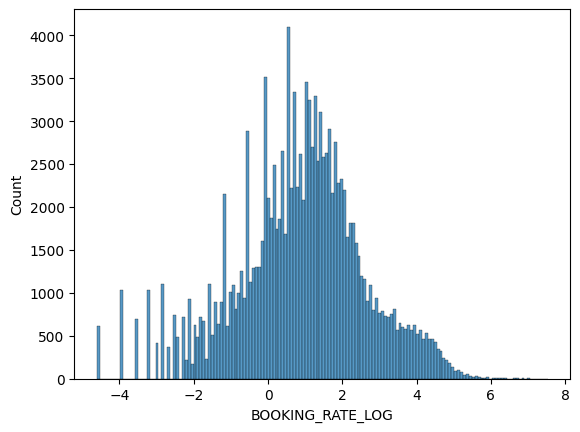

In [43]:
# listings['BOOKING_RATE'] = listings['minimum_nights_avg_ntm'] * listings['reviews_per_month']

# WITH LOG
listings['BOOKING_RATE_LOG'] = np.log(listings['minimum_nights'] * listings['reviews_per_month'])
sns.histplot(listings['BOOKING_RATE_LOG'])
plt.show()


ValueError: cannot reindex on an axis with duplicate labels

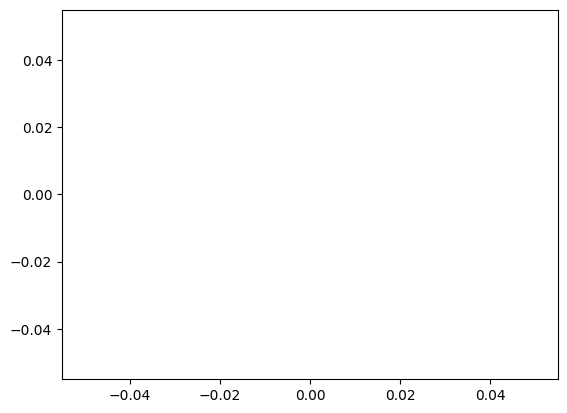

In [44]:
sns.scatterplot(data=listings, x='review_scores_rating', y='BOOKING_RATE_LOG')
# plt.scatter(listings['review_scores_rating'], listings['BOOKING_RATE_LOG'])
plt.show()

In [ ]:
#display the first few rows of the df
print(df.head())

#Check missing values
print(df.isnull().sum())

#basic statistics of the data
print(df.describe())


       id                          listing_url       scrape_id last_scraped  \
0    1419    https://www.airbnb.com/rooms/1419  20240214201029   2024-02-15   
1    8077    https://www.airbnb.com/rooms/8077  20240214201029   2024-02-15   
2   26654   https://www.airbnb.com/rooms/26654  20240214201029   2024-02-15   
3  307726  https://www.airbnb.com/rooms/307726  20240214201029   2024-02-15   
4  314459  https://www.airbnb.com/rooms/314459  20240214201029   2024-02-15   

            source                                               name  \
0  previous scrape                    Beautiful home in amazing area!   
1  previous scrape                 Downtown Harbourfront Private Room   
2      city scrape  World Class @ CN Tower, convention centre, The...   
3  previous scrape                 Boutique Chic at Maple Leaf Square   
4  previous scrape                Cosy room by Toronto's Danforth Ave   

                                         description  \
0  This large, family home is 

In [45]:
# List of column names you want to include in the correlation analysis
columns_to_include = ['accommodates', 'beds', 'minimum_nights', 'maximum_nights', 
                        'availability_30', 'availability_60', 'availability_90', 
                        'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
                        'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy',
                        'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                        'review_scores_location', 'review_scores_value']

# Select only the specified columns
df_selected = df[columns_to_include]

# Now compute the correlation matrix for the selected columns
correlation_matrix = df_selected.corr()
print(correlation_matrix)

KeyError: "None of [Index(['accommodates', 'beds', 'minimum_nights', 'maximum_nights',\n       'availability_30', 'availability_60', 'availability_90',\n       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',\n       'number_of_reviews_l30d', 'review_scores_rating',\n       'review_scores_accuracy', 'review_scores_cleanliness',\n       'review_scores_checkin', 'review_scores_communication',\n       'review_scores_location', 'review_scores_value'],\n      dtype='object')] are in the [columns]"

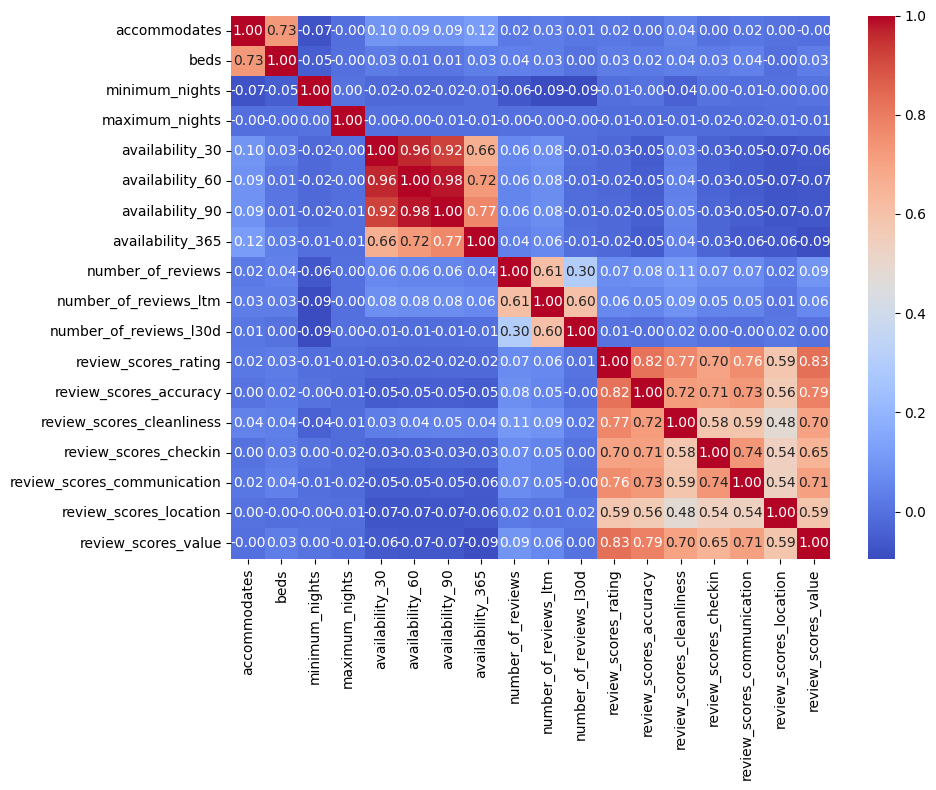

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.tight_layout()
plt.show()

KeyError: 'minimum_miimum_nights'

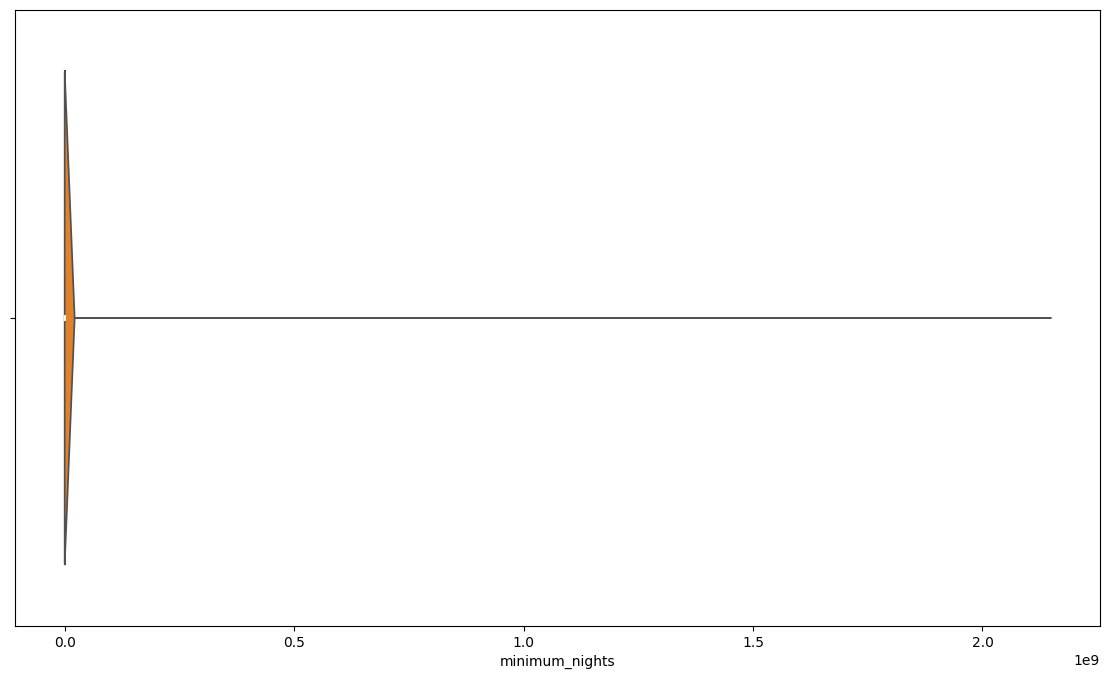

In [ ]:
# # plt.scatter(listings['review_scores_rating'],listings['availability_365'])

# f, axes = plt.subplots(8,1, figsize=(20,20))
# # features = [f"availability_{dur}" for dur in [30, 60, 90, 365]]
# features = [
#     'minimum_nights', 
#     'maximum_nights', 
#     'minimum_minimum_nights', 
#     'maximum_minimum_nights', 
#     'minimum_maximum_nights', 
#     'maximum_maximum_nights',
#     'minimum_nights_avg_ntm',
#     'maximum_nights_avg_ntm',
# ]

# # for i,feat in enumerate(features):
# #     print(i//4, i%4)
# #     sns.violinplot(data=listings, y=feat, ax=axes[i])

# sns.violinplot(data=listings, x=features[2])
# # plt.show()

# features = [
#     'minimum_nights', 
#     'maximum_nights', 
#     'minimum_minimum_nights', 
#     'maximum_minimum_nights', 
#     'minimum_maximum_nights', 
#     'maximum_maximum_nights',
#     'minimum_nights_avg_ntm',
#     'maximum_nights_avg_ntm',
# ]

# # Adjust the number of subplots and their layout


# plt.figure(figsize=(14, 8))  # Adjust the figure size if needed

# for feature in features:
#     sns.violinplot(x=listings[feature])
    
# plt.title('Violin Plots of Important Variables')

# plt.show()



<Axes: ylabel='minimum_nights_avg_ntm'>

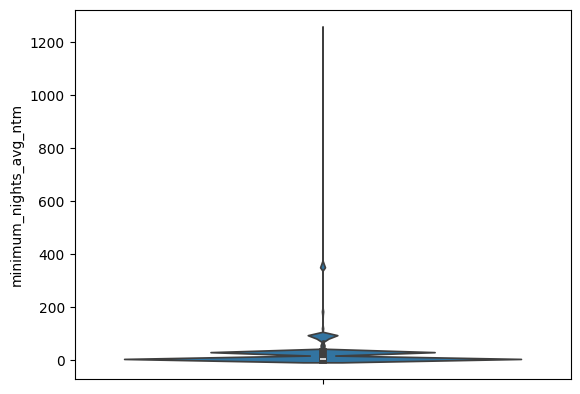

In [ ]:
sns.violinplot(listings['minimum_nights_avg_ntm'])

In [ ]:
def get_full_summary(df, exclude_columns=None):
    
    if exclude_columns is None:
        exclude_columns = []
    
    # Exclude specified columns
    df_filtered = df.drop(columns=exclude_columns)
    
    # Numeric summary using describe() for numeric columns, updated include parameter
    numeric_summary = df_filtered.describe(include='number')
    
    # Adding median to numeric summary. Adjusting the method for potential compatibility issues
    try:
        median = df_filtered.median(numeric_only=True).to_frame().T.rename(index={0: 'median'})
    except TypeError:  # In case of unexpected TypeError, fall back to excluding non-numeric
        median = df_filtered.select_dtypes(include='number').median().to_frame().T.rename(index={0: 'median'})
    
    numeric_summary = pd.concat([numeric_summary, median], axis=0)

    # Categorical summary using describe() for categorical columns, excluding specified columns
    categorical_summary = df_filtered.describe(exclude='number')
    
    return {'numeric_summary': numeric_summary, 'categorical_summary': categorical_summary}


# Specify columns to exclude
exclude_columns = ['id', 'listing_url', 'scrape_id', 'host_id', 'host_url', 
                       'host_thumbnail_url', 'host_picture_url', 'name', 'description', 
                       'neighborhood_overview', 'host_about', 'amenities', 'bathrooms_text', 
                       'last_scraped', 'host_since', 'calendar_last_scraped', 'first_review', 
                       'last_review', 'source', 'host_neighbourhood', 'calendar_updated', 'license', 'picture_url']
full_summary = get_full_summary(reviews, None)

print("Numeric Summary:")
print(full_summary['numeric_summary'])
print("\nCategorical Summary:")
print(full_summary['categorical_summary'])

Numeric Summary:
          listing_id            id   reviewer_id
count   4.086901e+06  4.086901e+06  4.086901e+06
mean    1.286849e+17  4.104130e+17  1.519084e+08
std     2.878550e+17  4.130155e+17  1.484143e+08
min     9.580000e+02  1.981000e+03  1.000000e+00
25%     1.102017e+07  3.438002e+08  3.152565e+07
50%     2.462662e+07  4.497724e+17  9.911354e+07
75%     4.834545e+07  8.276150e+17  2.318731e+08
max     1.073350e+18  1.087798e+18  5.601695e+08
median  2.462662e+07  4.497724e+17  9.911354e+07

Categorical Summary:
              date reviewer_name comments
count      4086901       4086895  4086253
unique        5121        320756  3915471
top     2023-07-09         David        .
freq          6929         31661     5322


In [ ]:
def plot_histograms(df, column1, column2):
  
    # Set up the matplotlib figure and axes for two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot the first column histogram
    df[column1].hist(ax=axes[0], bins=20, color='skyblue', edgecolor='black')
    axes[0].set_title(f'Histogram of {column1}')
    axes[0].set_xlabel(column1)
    axes[0].set_ylabel('Frequency')
    
    # Plot the second column histogram
    df[column2].hist(ax=axes[1], bins=20, color='lightgreen', edgecolor='black')
    axes[1].set_title(f'Histogram of {column2}')
    axes[1].set_xlabel(column2)
    axes[1].set_ylabel('Frequency')
    
    # Ensure the layout is not too tight
    plt.tight_layout()
    
    # Display the plots
    plt.show()



In [ ]:
import pandas as pd

def analyze_data_cleaning_needs(df):
    """
    Analyze a CSV file for common data cleaning needs.
    
    Args:
    csv_file_path (str): The path to the CSV file.
    
    Returns:
    dict: A summary of findings including missing values, data types, duplicates, and potential outliers.
    """
    
    # Initialize the analysis dictionary
    analysis = {
        "missing_values": df.isnull().sum(),
        "data_types": df.dtypes,
        "duplicate_rows": df.duplicated().sum(),
        "potential_outliers": {}
    }
    
    # Check for potential outliers using IQR
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outlier_count = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))].shape[0]
        if outlier_count > 0:
            analysis["potential_outliers"][column] = outlier_count
            
    return analysis

analyze_data_cleaning_needs(listings)

{'missing_values': id                                                  0
 listing_url                                         0
 scrape_id                                           0
 last_scraped                                        0
 source                                              0
                                                 ...  
 calculated_host_listings_count                      0
 calculated_host_listings_count_entire_homes         0
 calculated_host_listings_count_private_rooms        0
 calculated_host_listings_count_shared_rooms         0
 reviews_per_month                               49970
 Length: 75, dtype: int64,
 'data_types': id                                                int64
 listing_url                                      object
 scrape_id                                         int64
 last_scraped                                     object
 source                                           object
                                                  .

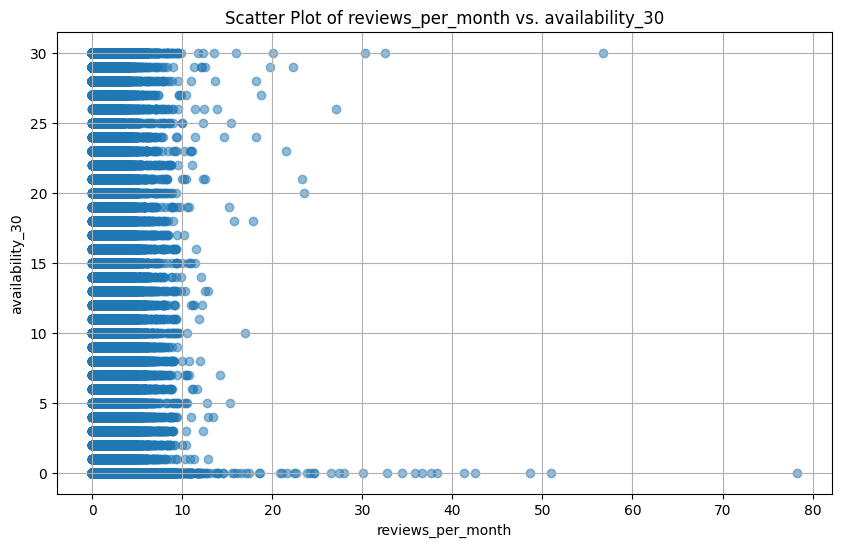

In [ ]:
def plot_scatter(df, column_x, column_y):
  
    plt.figure(figsize=(10, 6))  # Set the figure size
    plt.scatter(df[column_x], df[column_y], alpha=0.5)  # Create scatter plot with some transparency
    plt.title(f'Scatter Plot of {column_x} vs. {column_y}')  # Set the title of the plot
    plt.xlabel(column_x)  # Set the x-axis label
    plt.ylabel(column_y)  # Set the y-axis label
    plt.grid(True)  # Add a grid for better readability
    plt.show()  # Display the plot

plot_scatter(listings, 'reviews_per_month', 'availability_30')


In [ ]:
#aggregate scores togther 
# Filter out the relevant score columns
score_columns = [
    'review_scores_rating', 
    'review_scores_accuracy', 
    'review_scores_cleanliness', 
    'review_scores_checkin', 
    'review_scores_communication', 
    'review_scores_location', 
    'review_scores_value'
]

# Create a new DataFrame with only the score columns
scores_df = df[score_columns]

# Calculate the average score for each listing
# replace NaN with the column mean (considering only non-missing values for each score)
scores_df.fillna(scores_df.mean(), inplace=True)

# Calculate the aggregated score as the mean across the columns for each row
df['aggregated_score'] = scores_df.mean(axis=1)

# Inspect the new DataFrame with the aggregated score
print(df[['id', 'aggregated_score']].head())


                   id  aggregated_score
0  977395984065981849          2.857143
1  648033676238017128          4.894286
2  871990853610302281          4.720893
3            15943497          4.815714
4  845596919658541172          4.720893


C:\Users\henry\AppData\Local\Temp\ipykernel_3984\2408372650.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores_df.fillna(scores_df.mean(), inplace=True)


In [ ]:
print(df[[
    'review_scores_rating', 
    'review_scores_accuracy', 
    'review_scores_cleanliness', 
    'review_scores_checkin', 
    'review_scores_communication', 
    'review_scores_location', 
    'review_scores_value'
]])

       review_scores_rating  review_scores_accuracy  \
0                      2.00                    2.00   
1                      4.89                    5.00   
2                       NaN                     NaN   
3                      4.74                    4.78   
4                       NaN                     NaN   
...                     ...                     ...   
39197                   NaN                     NaN   
39198                   NaN                     NaN   
39199                   NaN                     NaN   
39200                  4.69                    4.72   
39201                  3.80                    4.20   

       review_scores_cleanliness  review_scores_checkin  \
0                           1.00                   4.00   
1                           4.72                   4.94   
2                            NaN                    NaN   
3                           4.71                   4.93   
4                            NaN            

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Let's assume 'df' is your DataFrame and it has been loaded with your dataset
# Replace 'your_dataframe' with the actual variable name of your DataFrame

# Replace the column names with the actual column names from your DataFrame
dependent_var = 'BOOKING_RATE_LOG'
independent_vars = [
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value'
]

listings_withReviews = listings.dropna(subset=independent_vars + [dependent_var])

# Split the data into independent X and dependent y variables
X = listings_withReviews[independent_vars]
y = listings_withReviews[dependent_var]

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model with the training data
model.fit(X_train, y_train)

# Predict the booking rates with the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the model evaluation
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the regression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
print(lr.summary())

Mean Squared Error (MSE): 3.0536341260212843
R-squared (R2 ): 0.016112766978150894
                            OLS Regression Results                            
Dep. Variable:       BOOKING_RATE_LOG   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     264.4
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        00:28:58   Log-Likelihood:            -2.1260e+05
No. Observations:              107912   AIC:                         4.252e+05
Df Residuals:                  107904   BIC:                         4.253e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [ ]:
dependent_var = 'BOOKING_RATE_LOG'
independent_vars = [
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value'
]


In [ ]:
print("Number of rows in reviews DataFrame:", len(reviews))


Number of rows in reviews DataFrame: 4086901


In [6]:
#updated part1 to filter for only english and check control vars
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from textblob import TextBlob
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
from langdetect import detect

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load data
def combine_data(source_folder_name="raw-dataset"):
    locations = ['toronto', 'sanfran', 'nyc', 'london', 'sydney']
    types = ['listings', 'reviews']

    global reviews
    reviews = pd.DataFrame()

    for t in types:
        data = []
        for l in locations:
            filename = f"./{source_folder_name}/{l}_{t}.csv"
            d = pd.read_csv(filename)
            data.append(d)

        if t == 'reviews':
            reviews = pd.concat(data)

# Sample data
def sample_data(df, sample_size):
    return df.sample(n=sample_size, random_state=42)

# Preprocessing
def preprocess_text(text):
    if isinstance(text, str):
        # Detect language
        try:
            language = detect(text)
        except:
            language = "unknown"
        
        if language == "en":
            # Tokenization
            tokens = word_tokenize(text)
            # Removing punctuation and converting to lowercase
            tokens = [word.lower() for word in tokens if word.isalnum()]
            # Removing stop words
            stop_words = set(stopwords.words('english'))
            tokens = [word for word in tokens if word not in stop_words]
            # Lemmatization
            lemmatizer = WordNetLemmatizer()
            tokens = [lemmatizer.lemmatize(word) for word in tokens]
            return ' '.join(tokens)
        else:
            return ""  # Return empty string for non-English texts
    else:
        return ""  # Return empty string for None or non-string inputs


# Load and combine data
combine_data()

# Sample data
sample_size = 30000  # Set your desired sample size
sampled_reviews = sample_data(reviews, sample_size)

# Filter out non-English reviews
def detect_language(text):
    try:
        return detect(text) == 'en'
    except:
        return False

sampled_reviews = sampled_reviews[sampled_reviews['comments'].apply(detect_language)]

# Check if we have at least 10,000 samples for training and testing
if len(sampled_reviews) < 10000:
    print("Insufficient English reviews after filtering. Please adjust the sample size.")
else:
    # Preprocess text
    sampled_reviews['clean_comments'] = sampled_reviews['comments'].apply(preprocess_text)

    # Sentiment Analysis Labeling
    def get_sentiment_score(text):
        blob = TextBlob(text)
        sentiment_score = blob.sentiment.polarity
        return sentiment_score

    sampled_reviews['sentiment_score'] = sampled_reviews['clean_comments'].apply(get_sentiment_score)

    # Convert sentiment scores to labels
    def label_sentiment(score):
        if score > 0:
            return 'positive'
        elif score < 0:
            return 'negative'
        else:
            return 'neutral'

    sampled_reviews['sentiment'] = sampled_reviews['sentiment_score'].apply(label_sentiment)

    # Define the factors of interest
    factors_of_interest = ['rating', 'accuracy', 'cleanliness', 'checkin', 'communication', 'location', 'value for money']

    # Initialize WordNet lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Function to lemmatize words
    def lemmatize_words(text):
        words = word_tokenize(text)
        lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
        return ' '.join(lemmatized_words)

    # Apply lemmatization to reviews before extracting contexts
    sampled_reviews['clean_comments_lemmatized'] = sampled_reviews['clean_comments'].apply(lemmatize_words)

    # Apply sentiment analysis to factor contexts
    def extract_contexts(text):
        return [word for word in word_tokenize(text) if word in factors_of_interest]

    def analyze_sentiment(contexts):
        if len(contexts) == 0:
            return 'neutral'
        else:
            sentiment_scores = [get_sentiment_score(word) for word in contexts]
            avg_sentiment = sum(sentiment_scores) / len(sentiment_scores)
            return label_sentiment(avg_sentiment)

    sampled_reviews['factor_contexts'] = sampled_reviews['clean_comments_lemmatized'].apply(extract_contexts)
    sampled_reviews['factor_sentiment'] = sampled_reviews['factor_contexts'].apply(analyze_sentiment)

    # Split data into training and testing sets
    if len(sampled_reviews) > 0:
        X_train, X_test, y_train, y_test = train_test_split(sampled_reviews['clean_comments'], sampled_reviews['sentiment'], test_size=0.2, random_state=42)
    else:
        print("No English reviews found after filtering.")



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nawalhaque/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nawalhaque/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nawalhaque/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [69]:
#testing for auto sample size adjustment 

import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from textblob import TextBlob
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
from langdetect import detect

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load data
def combine_data(source_folder_name="raw-dataset"):
    locations = ['toronto', 'sanfran', 'nyc', 'london', 'sydney']
    types = ['listings', 'reviews']

    global reviews
    reviews = pd.DataFrame()

    for t in types:
        data = []
        for l in locations:
            filename = f"./{source_folder_name}/{l}_{t}.csv"
            d = pd.read_csv(filename)
            data.append(d)

        if t == 'reviews':
            reviews = pd.concat(data)

# Sample data with dynamic adjustment of sample size
def sample_data_with_adjustment(df, target_size):
    while len(df) < target_size:
        target_size -= 1000  # Reduce sample size by 1000 each iteration
        sampled_data = df.sample(n=target_size, random_state=42)
        if len(sampled_data) >= target_size:
            return sampled_data
    return df.sample(n=target_size, random_state=42)

# Preprocessing
def preprocess_text(text):
    if isinstance(text, str):
        # Detect language
        try:
            language = detect(text)
        except:
            language = "unknown"
        
        if language == "en":
            # Tokenization
            tokens = word_tokenize(text)
            # Removing punctuation and converting to lowercase
            tokens = [word.lower() for word in tokens if word.isalnum()]
            # Removing stop words
            stop_words = set(stopwords.words('english'))
            tokens = [word for word in tokens if word not in stop_words]
            # Lemmatization
            lemmatizer = WordNetLemmatizer()
            tokens = [lemmatizer.lemmatize(word) for word in tokens]
            return ' '.join(tokens)
        else:
            return ""  # Return empty string for non-English texts
    else:
        return ""  # Return empty string for None or non-string inputs


# Load and combine data
combine_data()

# Filter out non-English reviews and adjust sample size
sample_size = 40000  # Set initial sample size
sampled_reviews = sample_data_with_adjustment(reviews, sample_size)
sampled_reviews = sampled_reviews[sampled_reviews['comments'].apply(detect_language)]

# Ensure at least 10,000 English reviews for training and testing
while len(sampled_reviews) < 20000:
    sample_size += 1000  # Increase sample size by 1000
    sampled_reviews = sample_data_with_adjustment(reviews, sample_size)
    sampled_reviews = sampled_reviews[sampled_reviews['comments'].apply(detect_language)]
    if len(sampled_reviews) >= 30000:
        print("Sample size adjustment failed. Please adjust manually.")
        break

# Preprocess text
sampled_reviews['clean_comments'] = sampled_reviews['comments'].apply(preprocess_text)

# Sentiment Analysis Labeling
def get_sentiment_score(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    return sentiment_score

sampled_reviews['sentiment_score'] = sampled_reviews['clean_comments'].apply(get_sentiment_score)

# Convert sentiment scores to labels
def label_sentiment(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

sampled_reviews['sentiment'] = sampled_reviews['sentiment_score'].apply(label_sentiment)

# Define the factors of interest
factors_of_interest = ['rating', 'accuracy', 'cleanliness', 'checkin', 'communication', 'location', 'value for money']

# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize words
def lemmatize_words(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Apply lemmatization to reviews before extracting contexts
sampled_reviews['clean_comments_lemmatized'] = sampled_reviews['clean_comments'].apply(lemmatize_words)

# Apply sentiment analysis to factor contexts
def extract_contexts(text):
    return [word for word in word_tokenize(text) if word in factors_of_interest]

def analyze_sentiment(contexts):
    if len(contexts) == 0:
        return 'neutral'
    else:
        sentiment_scores = [get_sentiment_score(word) for word in contexts]
        avg_sentiment = sum(sentiment_scores) / len(sentiment_scores)
        return label_sentiment(avg_sentiment)

sampled_reviews['factor_contexts'] = sampled_reviews['clean_comments_lemmatized'].apply(extract_contexts)
sampled_reviews['factor_sentiment'] = sampled_reviews['factor_contexts'].apply(analyze_sentiment)

# Split data into training and testing sets
if len(sampled_reviews) > 10000:
    X_train, X_test, y_train, y_test = train_test_split(sampled_reviews['clean_comments'], sampled_reviews['sentiment'], test_size=0.2, random_state=42)
else:
    print("No English reviews found after filtering.")



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nawalhaque/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nawalhaque/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nawalhaque/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [70]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from textblob import TextBlob
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
from langdetect import detect

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load data
def combine_data(source_folder_name="raw-dataset"):
    locations = ['toronto', 'sanfran', 'nyc', 'london', 'sydney']
    types = ['listings', 'reviews']

    global reviews
    reviews = pd.DataFrame()

    for t in types:
        data = []
        for l in locations:
            filename = f"./{source_folder_name}/{l}_{t}.csv"
            d = pd.read_csv(filename)
            data.append(d)

        if t == 'reviews':
            reviews = pd.concat(data)

# Sample data with dynamic adjustment of sample size
def sample_data_with_adjustment(df, target_size):
    while len(df) < target_size:
        target_size -= 1000  # Reduce sample size by 1000 each iteration
        sampled_data = df.sample(n=target_size, random_state=42)
        if len(sampled_data) >= target_size:
            return sampled_data
    return df.sample(n=target_size, random_state=42)

# Preprocessing
def preprocess_text(text):
    if isinstance(text, str):
        # Detect language
        try:
            language = detect(text)
        except:
            language = "unknown"
        
        if language == "en":
            # Tokenization
            tokens = word_tokenize(text)
            # Removing punctuation and converting to lowercase
            tokens = [word.lower() for word in tokens if word.isalnum()]
            # Removing stop words
            stop_words = set(stopwords.words('english'))
            tokens = [word for word in tokens if word not in stop_words]
            # Lemmatization
            lemmatizer = WordNetLemmatizer()
            tokens = [lemmatizer.lemmatize(word) for word in tokens]
            return ' '.join(tokens)
        else:
            return ""  # Return empty string for non-English texts
    else:
        return ""  # Return empty string for None or non-string inputs


# Load and combine data
combine_data()

# Filter out non-English reviews and adjust sample size
sample_size = 40000  # Set initial sample size
sampled_reviews = sample_data_with_adjustment(reviews, sample_size)
sampled_reviews = sampled_reviews[sampled_reviews['comments'].apply(detect_language)]

# Ensure at least 20,000 English reviews for training and testing
while len(sampled_reviews) < 20000:
    sample_size += 1000  # Increase sample size by 1000
    sampled_reviews = sample_data_with_adjustment(reviews, sample_size)
    sampled_reviews = sampled_reviews[sampled_reviews['comments'].apply(detect_language)]
    if len(sampled_reviews) >= 30000:
        print("Sample size adjustment failed. Please adjust manually.")
        break

# Preprocess text
sampled_reviews['clean_comments'] = sampled_reviews['comments'].apply(preprocess_text)

# Sentiment Analysis Labeling
def get_sentiment_score(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    return sentiment_score

sampled_reviews['sentiment_score'] = sampled_reviews['clean_comments'].apply(get_sentiment_score)

# Convert sentiment scores to labels
def label_sentiment(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

sampled_reviews['sentiment'] = sampled_reviews['sentiment_score'].apply(label_sentiment)

# Define the factors of interest
factors_of_interest = ['rating', 'accuracy', 'cleanliness', 'checkin', 'communication', 'location', 'value for money']

# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize words
def lemmatize_words(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Apply lemmatization to reviews before extracting contexts
sampled_reviews['clean_comments_lemmatized'] = sampled_reviews['clean_comments'].apply(lemmatize_words)

# Apply sentiment analysis to factor contexts
def extract_contexts(text):
    return [word for word in word_tokenize(text) if word in factors_of_interest]

def analyze_sentiment(contexts):
    if len(contexts) == 0:
        return 'neutral'
    else:
        sentiment_scores = [get_sentiment_score(word) for word in contexts]
        avg_sentiment = sum(sentiment_scores) / len(sentiment_scores)
        return label_sentiment(avg_sentiment)

sampled_reviews['factor_contexts'] = sampled_reviews['clean_comments_lemmatized'].apply(extract_contexts)
sampled_reviews['factor_sentiment'] = sampled_reviews['factor_contexts'].apply(analyze_sentiment)

# Split data into training and testing sets
if len(sampled_reviews) > 10000:
    X_train, X_test, y_train, y_test = train_test_split(sampled_reviews['clean_comments'], sampled_reviews['sentiment'], test_size=0.2, random_state=42)
else:
    print("No English reviews found after filtering.")


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nawalhaque/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nawalhaque/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nawalhaque/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [38]:


# Convert text data to numerical sequences
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure they have the same length
max_length = 100
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Build LSTM model
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=max_length),
    Dropout(0.2),
    LSTM(units=64, dropout=0.2, recurrent_dropout=0.2),
    Dense(units=3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_padded, y_train_encoded, epochs=20, batch_size=32, 
                    validation_data=(X_test_padded, y_test_encoded),
                    callbacks=[early_stopping])


# Get training and validation accuracy from the history object
training_accuracy = history.history['accuracy'][-1]
validation_accuracy = history.history['val_accuracy'][-1]

# Evaluate the model on the testing data
_, test_accuracy = model.evaluate(X_test_padded, y_test_encoded)

# Print the accuracies
print("Training Accuracy:", training_accuracy)
print("Validation Accuracy:", validation_accuracy)
print("Testing Accuracy:", test_accuracy)


import numpy as np

# Select three random reviews from the dataset
random_indices = np.random.randint(0, len(sampled_reviews), size=3)
random_reviews = sampled_reviews.iloc[random_indices][['comments', 'sentiment']]

for i, (index, row) in enumerate(random_reviews.iterrows()):
    # Access the review and sentiment from the row
    review_text = row['comments']
    actual_sentiment = row['sentiment']
    random_review_seq = tokenizer.texts_to_sequences([review_text])
    random_review_padded = pad_sequences(random_review_seq, maxlen=max_length, padding='post', truncating='post')

    # Predict the sentiment
    predicted_probabilities = model.predict(random_review_padded)
    predicted_sentiment_index = np.argmax(predicted_probabilities)
    predicted_sentiment = label_encoder.classes_[predicted_sentiment_index]

    print(f"\nRandom Review {i + 1}:")
    print("Review:", review_text)
    print("Actual Sentiment:", actual_sentiment)
    print("Predicted Sentiment:", predicted_sentiment)
    print("Predicted Probabilities:", predicted_probabilities)


Epoch 1/20


/Users/nawalhaque/anaconda3/envs/cisc351/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


881/881 ━━━━━━━━━━━━━━━━━━━━ 37s 40ms/step - accuracy: 0.9704 - loss: 0.1785 - val_accuracy: 0.9729 - val_loss: 0.1468
Epoch 2/20
881/881 ━━━━━━━━━━━━━━━━━━━━ 34s 39ms/step - accuracy: 0.9750 - loss: 0.1345 - val_accuracy: 0.9729 - val_loss: 0.1441
Epoch 3/20
881/881 ━━━━━━━━━━━━━━━━━━━━ 36s 40ms/step - accuracy: 0.9743 - loss: 0.1374 - val_accuracy: 0.9729 - val_loss: 0.1441
Epoch 4/20
881/881 ━━━━━━━━━━━━━━━━━━━━ 35s 40ms/step - accuracy: 0.9744 - loss: 0.1376 - val_accuracy: 0.9729 - val_loss: 0.1427
Epoch 5/20
881/881 ━━━━━━━━━━━━━━━━━━━━ 35s 40ms/step - accuracy: 0.9753 - loss: 0.1338 - val_accuracy: 0.9726 - val_loss: 0.1433
Epoch 6/20
881/881 ━━━━━━━━━━━━━━━━━━━━ 35s 40ms/step - accuracy: 0.9734 - loss: 0.1419 - val_accuracy: 0.9729 - val_loss: 0.1431
Epoch 7/20
881/881 ━━━━━━━━━━━━━━━━━━━━ 34s 38ms/step - accuracy: 0.9770 - loss: 0.1258 - val_accuracy: 0.9728 - val_loss: 0.1431
221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9753 - loss: 0.1319
Training Accuracy: 0.97484

Correlation between sentiment scores and booking rates: 0.02494301854661185


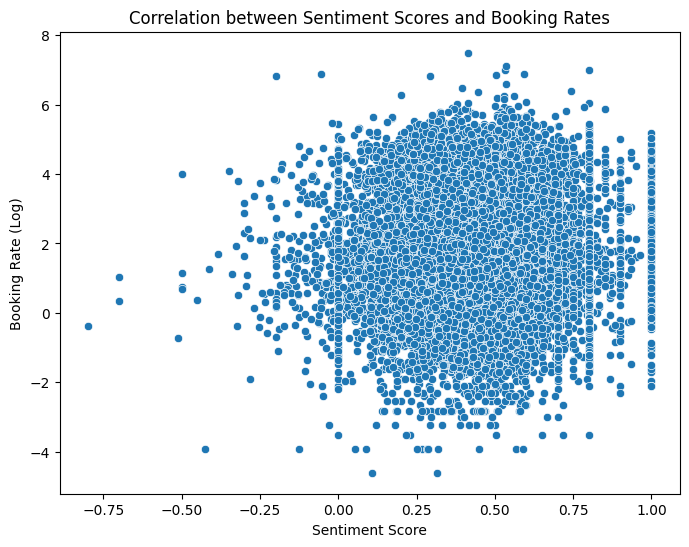

In [68]:
# Aggregate sentiment scores for each listing
listing_sentiment = sampled_reviews.groupby('listing_id')['sentiment_score'].mean().reset_index()

# Merge sentiment scores with listing data
combined_data = pd.merge(listings, listing_sentiment, left_on='id', right_on='listing_id', how='left')

# Calculate correlation between sentiment scores and booking rates
correlation = combined_data[['sentiment_score', 'BOOKING_RATE_LOG']].corr().iloc[0, 1]

print("Correlation between sentiment scores and booking rates:", correlation)

# Visualize correlation (optional)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=combined_data, x='sentiment_score', y='BOOKING_RATE_LOG')
plt.title('Correlation between Sentiment Scores and Booking Rates')
plt.xlabel('Sentiment Score')
plt.ylabel('Booking Rate (Log)')
plt.show()

# Hypothesis Testing (optional)
positive_listings = combined_data[combined_data['sentiment_score'] > 0]['BOOKING_RATE_LOG']
negative_listings = combined_data[combined_data['sentiment_score'] < 0]['BOOKING_RATE_LOG']
neutral_listings = combined_data[combined_data['sentiment_score'] == 0]['BOOKING_RATE_LOG']

# Perform hypothesis testing (e.g., t-test or ANOVA) to compare booking rates between different sentiment groups
# You can use statistical tests from libraries like scipy.stats

# Interpretation and Insights
# Based on the correlation analysis and hypothesis testing results, provide insights and recommendations for hosts
